# 데이터 셋 크기가 커서 업로드 불가

## 필요한 모듈 임포트

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [4]:
train_df = pd.read_csv('dataset/jeju/train.csv')
test_df = pd.read_csv('dataset/jeju/test.csv')
info_df = pd.read_csv('dataset/jeju/data_info.csv')
submission_df = pd.read_csv('dataset/jeju/sample_submission.csv')

In [5]:
train_df.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


#### id열 삭제

In [6]:
train_df.drop(['id', 'base_date', 'height_restricted', 'vehicle_restricted', 'road_name', 'weight_restricted'], axis=1, inplace=True)
test_df.drop(['id', 'base_date', 'height_restricted', 'vehicle_restricted', 'road_name', 'weight_restricted'], axis=1, inplace=True)

#### info_df(컬럼별 정보)

In [7]:
info_df.drop(info_df.loc[info_df['변수명'] == 'road_in_use'].index, axis=0, inplace=True)
info_df.reset_index(drop=True)

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,lane_count,차로수
5,road_rating,도로등급
6,multi_linked,중용구간 여부
7,connect_code,연결로 코드
8,maximum_speed_limit,최고속도제한
9,weight_restricted,통과제한하중


In [8]:
train_df.head()

,day_of_week,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,목,17,1,106,0,0,60.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,목,21,2,103,0,0,60.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,일,7,2,103,0,0,80.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,금,13,2,107,0,0,50.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,화,8,2,103,0,0,80.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


#### day_of_week 값 조정  
평일이면 0, 주말이면 1

In [9]:
weekday = ['월', '화', '수', '목', '금']

train_df['day_of_week'] = train_df['day_of_week'].apply(lambda day : 0 if day in weekday else 1)
test_df['day_of_week'] = test_df['day_of_week'].apply(lambda day : 0 if day in weekday else 1)

In [10]:
train_df['day_of_week'].value_counts()

day_of_week
0    3357818
1    1343399
Name: count, dtype: int64

#### base_hour 값 조정  
0~5이면 0, 6~11이면 1, 12~17이면 2, 18~23이면 3

In [11]:
def base_h(hour):
    if hour >= 0 and hour < 6:
        return 0
    elif hour >= 6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    else:
        return 3

train_df['base_hour'] = train_df['base_hour'].apply(base_h)
test_df['base_hour'] = test_df['base_hour'].apply(base_h)

In [12]:
train_df['base_hour'].value_counts()

base_hour
2    1271650
3    1210872
1    1210512
0    1008183
Name: count, dtype: int64

#### distance 행 생성  
루트((시작 위도 - 끝 위도) ** 2 + (시작 경도 - 끝 경도) ** 2) 식으로 distance 생성

In [13]:
train_df['distance'] = np.sqrt(((train_df['start_longitude'] - train_df['end_longitude']) ** 2) + ((train_df['start_latitude'] - train_df['end_latitude']) ** 2))
test_df['distance'] = np.sqrt(((test_df['start_longitude'] - test_df['end_longitude']) ** 2) + ((test_df['start_latitude'] - test_df['end_latitude']) ** 2))

In [14]:
train_df['distance']

0          0.000277
1          0.004987
2          0.006516
3          0.001104
4          0.003630
             ...   
4701212    0.004533
4701213    0.000522
4701214    0.003084
4701215    0.002063
4701216    0.001465
Name: distance, Length: 4701217, dtype: float64

In [15]:
train_df.drop(['start_longitude', 'end_longitude', 'start_latitude', 'end_latitude'], axis=1, inplace=True)
test_df.drop(['start_longitude', 'end_longitude', 'start_latitude', 'end_latitude'], axis=1, inplace=True)

#### 출발지와 도착지가 같은지 여부 조사
같으면 0, 다르면 1

In [16]:
train_df['start_end_same'] = train_df['start_node_name'] == train_df['end_node_name']
test_df['start_end_same'] = test_df['start_node_name'] == test_df['end_node_name']

In [17]:
train_df['start_end_same'] = train_df['start_end_same'].apply(lambda x : 0 if x else 1)
test_df['start_end_same'] = test_df['start_end_same'].apply(lambda x : 0 if x else 1)

In [18]:
train_df['start_end_same'].value_counts()

start_end_same
1    3774274
0     926943
Name: count, dtype: int64

In [19]:
train_df.drop(['start_node_name', 'end_node_name'], axis=1, inplace=True)
test_df.drop(['start_node_name', 'end_node_name'], axis=1, inplace=True)

In [20]:
train_df.head()

,day_of_week,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,road_type,start_turn_restricted,end_turn_restricted,target,distance,start_end_same
0,0,2,1,106,0,0,60.0,3,없음,없음,52.0,0.000277,0
1,0,3,2,103,0,0,60.0,0,있음,없음,30.0,0.004987,1
2,1,1,2,103,0,0,80.0,0,없음,없음,61.0,0.006516,1
3,0,2,2,107,0,0,50.0,0,없음,없음,20.0,0.001104,1
4,0,1,2,103,0,0,80.0,0,없음,없음,38.0,0.003630,1


#### 도로 등급 분류
103이면 0, 106이면 1, 107이면 2

In [21]:
train_df['road_rating'].value_counts()

road_rating
103    2159511
107    1582214
106     959492
Name: count, dtype: int64

In [22]:
train_df['road_rating'] = train_df['road_rating'].apply(lambda x : 0 if x == 103 else (1 if x == 106 else 2))
test_df['road_rating'] = test_df['road_rating'].apply(lambda x : 0 if x == 103 else (1 if x == 106 else 2))

#### 최대 속도 제한 분류
30은 1, 40은 2, 50은 3, 60은 4, 70은 5, 80은 6

In [23]:
train_df['maximum_speed_limit'] = train_df['maximum_speed_limit'].apply(lambda x : int((x - 20) / 10))
test_df['maximum_speed_limit'] = test_df['maximum_speed_limit'].apply(lambda x : int((x - 20) / 10))

In [24]:
train_df['maximum_speed_limit'].value_counts()

maximum_speed_limit
4    1665573
3    1103682
5     995077
6     700334
1     229761
2       6790
Name: count, dtype: int64

#### 시작, 도착 지점의 회전 제한 유무 분류
있음이면 0, 없음이면 1

In [25]:
train_df['start_turn_restricted'] = train_df['start_turn_restricted'].apply(lambda x : 0 if x == '있음' else 1)
train_df['end_turn_restricted'] = train_df['end_turn_restricted'].apply(lambda x : 0 if x == '있음' else 1)
test_df['start_turn_restricted'] = test_df['start_turn_restricted'].apply(lambda x : 0 if x == '있음' else 1)
test_df['end_turn_restricted'] = test_df['end_turn_restricted'].apply(lambda x : 0 if x == '있음' else 1)

In [26]:
train_df.head()

,day_of_week,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,road_type,start_turn_restricted,end_turn_restricted,target,distance,start_end_same
0,0,2,1,1,0,0,4,3,1,1,52.0,0.000277,0
1,0,3,2,0,0,0,4,0,0,1,30.0,0.004987,1
2,1,1,2,0,0,0,6,0,1,1,61.0,0.006516,1
3,0,2,2,2,0,0,3,0,1,1,20.0,0.001104,1
4,0,1,2,0,0,0,6,0,1,1,38.0,0.003630,1


#### connect code 분류
0이면 0, 103이면 1

In [27]:
train_df['connect_code'] = train_df['connect_code'].apply(lambda x : 0 if x == 0 else 1)
test_df['connect_code'] = test_df['connect_code'].apply(lambda x : 0 if x == 0 else 1)

In [28]:
train_df['connect_code'].value_counts()

connect_code
0    4689075
1      12142
Name: count, dtype: int64

c:\Users\Playdata\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\Playdata\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Playdata\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


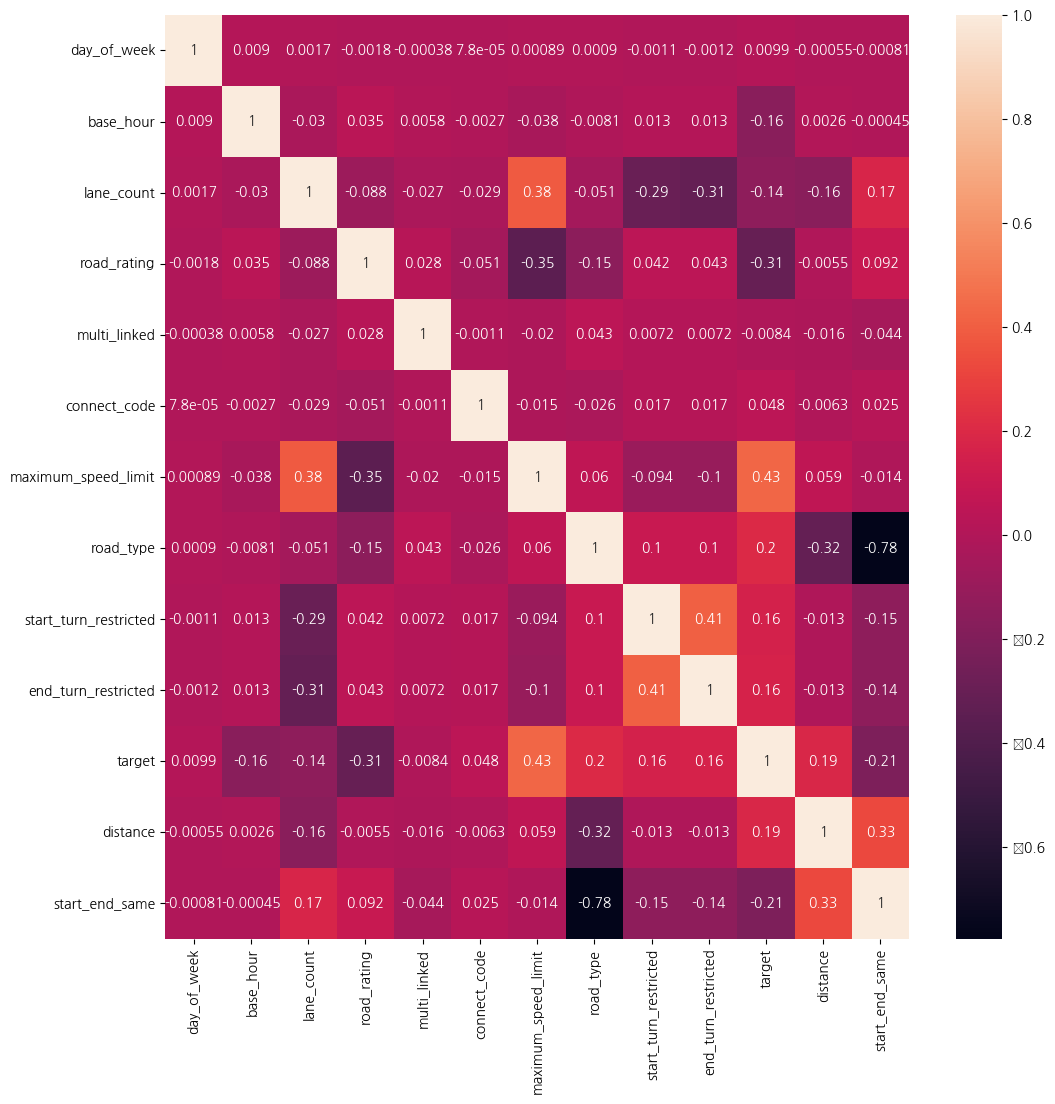

In [29]:
plt.figure(figsize=(12, 12))
sns.heatmap(train_df.corr(), annot=True)

* ## tensorflow Sequential model 생성 후 예측

#### 학습 할 데이터 생성

In [30]:
from sklearn.model_selection import train_test_split

train_label = train_df.drop(['target', 'distance'], axis=1)
train_target = train_df['target']
test_df.drop('distance', axis=1, inplace=True)

#### get_dummies로 가변수화, test_encoded에 없는 컬럼 추가

In [31]:
train_encoded = pd.get_dummies(train_label, columns=['day_of_week', 'base_hour','lane_count', 'road_rating', 'multi_linked', 'connect_code',
                                               'maximum_speed_limit', 'road_type', 'start_turn_restricted', 'end_turn_restricted', 'start_end_same'])
test_encoded = pd.get_dummies(test_df, columns=['day_of_week', 'base_hour','lane_count', 'road_rating', 'multi_linked', 'connect_code',
                                               'maximum_speed_limit', 'road_type', 'start_turn_restricted', 'end_turn_restricted', 'start_end_same'])
test_encoded.insert(15, 'connect_code_1', False)
test_encoded.insert(14, 'multi_linked_1', False)
test_encoded.insert(18, 'maximum_speed_limit_2', False)


X_train, X_val, y_train, y_val = train_test_split(train_encoded, train_target, test_size=0.2, shuffle=True)

In [32]:
X_train.shape

(3760973, 30)

#### Sequential 모델 생성

In [33]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1000, activation='relu', input_shape=[30,]))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [34]:
model.fit(X_train, y_train, epochs=3, validation_data=(X_val, y_val))

Epoch 1/3
117531/117531 [==============================] - 221s 2ms/step - loss: 126.8048 - mae: 8.5225 - val_loss: 104.2166 - val_mae: 7.8974
Epoch 2/3
117531/117531 [==============================] - 225s 2ms/step - loss: 109.3175 - mae: 8.1547 - val_loss: 103.8785 - val_mae: 7.8625
Epoch 3/3
117531/117531 [==============================] - 236s 2ms/step - loss: 109.0521 - mae: 8.1447 - val_loss: 103.3109 - val_mae: 7.8751


In [35]:
pred = model.predict(test_encoded)

9102/9102 [==============================] - 7s 799us/step


#### 제출

In [36]:
submission_df['target'] = pred
submission_df.to_csv('dataset/jeju/submit.csv', index=False)